# Advanced Classification Part 3 - Exercises with Results

## Exercise 1

#### Task 1 
##### Load libraries that are used in this module.

#### Result:

In [1]:
# Helper packages.
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt                     
import numpy as np
import math

# Scikit-learn packages for building models and model evaluation.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from pathlib import Path

#### Task 2
##### Define the directory settings.

#### Result:

In [2]:
# Set 'main_dir' to location of the project folder
home_dir = Path(".").resolve()
main_dir = home_dir.parent.parent
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)

/Users/aashika/Desktop/skillsoft-advanced-classification-2022
/Users/aashika/Desktop/skillsoft-advanced-classification-2022/data


#### Task 3
##### Load the clean pickled dataset `bank_clean.sav` and save as `bank`.
##### Print the head of the data.

#### Result:

In [3]:
bank = pickle.load(open(str(data_dir)+"/bank_clean.sav","rb")) 

In [4]:
print(bank.head())

       age  campaign  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
35577   32         1          -1.8          92.893          -46.2      1.244   
13950   33         2           1.4          93.918          -42.7      4.963   
29451   25         5          -1.8          93.075          -47.1      1.405   
32295   34         1          -1.8          92.893          -46.2      1.313   
27477   53         7          -0.1          93.200          -42.0      4.021   

       nr_employed  y  
35577         5099  0  
13950         5228  0  
29451         5099  1  
32295         5099  0  
27477         5196  0  


#### Task 4
##### Select the predictors by dropping variable `y` and save the result to a dataframe `X_ex`.
##### Save the target variable `y` column to `y_ex` variable.
##### Set seed as 1.
##### Split the data into training and test sets with 70:30 ratio and save respective variables to `X_train_ex`, `X_test_ex`, `y_train_ex`, `y_test_ex`.

#### Result:

In [5]:
# Select the predictors and target.
X_ex = bank.drop(['y'], axis = 1)
y_ex = np.array(bank['y'])

# Set the seed to 1.
np.random.seed(1)

# Split into training and test sets.
X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(X_ex, y_ex, test_size = 0.3)

#### Task 5
##### Create a vanilla random forest classifier and save it to `forest_ex` variable.
##### Fit the classifier to our training data.
##### Predict on test set and save as `forest_y_predict_ex`

#### Result:

In [6]:
forest_ex = RandomForestClassifier()

In [7]:
forest_ex.fit(X_train_ex, y_train_ex)

RandomForestClassifier()

In [8]:
# Predict on test data.
forest_y_predict_ex = forest_ex.predict(X_test_ex)

# Look at the first few predictions.
print(forest_y_predict_ex[0:5, ])

[1 1 0 1 0]


#### Task 6
##### Predict again on test set but this time obtain probabilities.
##### Save as `forest_y_predict_prob_ex`.

#### Result:

In [9]:
#Predict on test, but instead of labels 
# we will get probabilities for class 0 and 1.
forest_y_predict_prob_ex = forest_ex.predict_proba(X_test_ex) 
print(forest_y_predict_prob_ex[5:])

[[0.91666667 0.08333333]
 [0.85       0.15      ]
 [0.99       0.01      ]
 ...
 [0.98       0.02      ]
 [0.36       0.64      ]
 [0.89       0.11      ]]


#### Task 7
##### Compute the following metrics and save them as given below: 
* Accuracy `forest_accuracy_ex`
* Precision `forest_precision_ex`
* Recall `forest_recall_ex`
* Precision-recall plot `rf_prec_recall_ex`
* F1 score `forest_f1_ex `
* Fbeta `forest_fbeta_ex`
* Log loss `forest_log_loss_ex`
* ROC plot `rf_roc_ex`
* AUC `forest_auc_ex`

#### Result:


In [10]:
forest_accuracy_ex = metrics.accuracy_score(y_test_ex, 
                                            forest_y_predict_ex)
print(forest_accuracy_ex)

0.8716666666666667


In [11]:
forest_precision_ex = metrics.precision_score(y_test_ex, 
                                              forest_y_predict_ex)
print(forest_precision_ex)

0.4411764705882353


In [12]:
forest_recall_ex = metrics.recall_score(y_test_ex, 
                                        forest_y_predict_ex)
print(forest_recall_ex)

0.2054794520547945


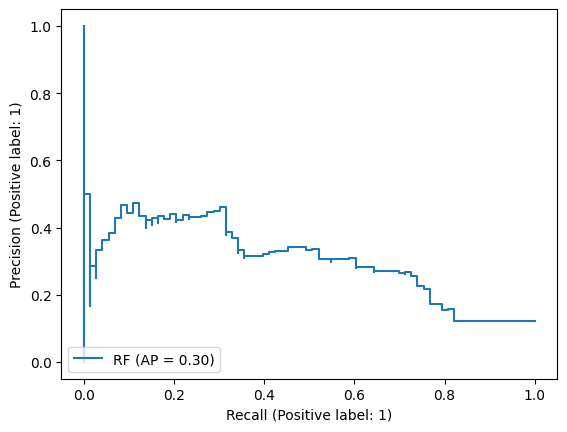

In [13]:
rf_prec_recall_ex = metrics.plot_precision_recall_curve(forest_ex, 
                                                        X_test_ex, y_test_ex, 
                                                        name = "RF")
plt.show()

In [14]:
forest_f1_ex = metrics.f1_score(y_test_ex, 
                                forest_y_predict_ex)
print(forest_f1_ex)

0.2803738317757009


In [15]:
forest_fbeta_ex = metrics.fbeta_score(y_test_ex, 
                                      forest_y_predict_ex, 
                                      beta = 0.5)
print(forest_fbeta_ex)

0.3588516746411483


In [16]:
# The second argument is an array of predicted probabilities, not labels!
forest_log_loss_ex = metrics.log_loss(y_test_ex, forest_y_predict_prob_ex[:, 1], eps=1e-15)
print ("Log loss: ", forest_log_loss_ex)

Log loss:  1.0075494584661249


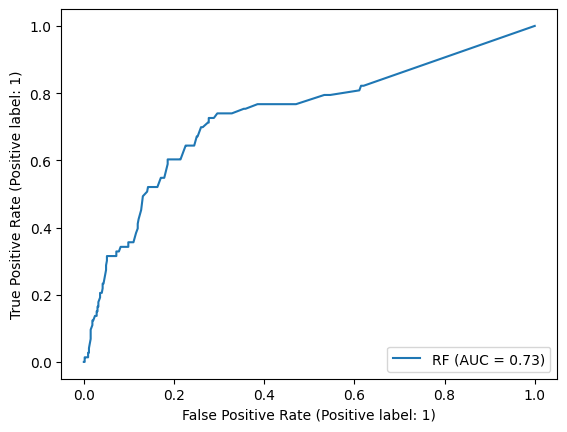

In [17]:
rf_roc_ex = metrics.plot_roc_curve(forest_ex,
                                   X_test_ex,
                                   y_test_ex,
                                   name = "RF")
plt.show()

In [18]:
# Where y_pred are probabilities and y_true are binary class labels
forest_auc_ex = metrics.roc_auc_score(y_test_ex, forest_y_predict_prob_ex[:, 1])
print("AUC: ", forest_auc_ex)

AUC:  0.7337734917210366


#### Task 8
##### We've summarized all the metrics into the function `get_performance_scores()` below. 
##### Compute the metrics of our random forest model and print results.
##### Save as `metrics_forest_ex`.

In [19]:
def get_performance_scores(y_test, y_predict, y_predict_prob, eps=1e-15, beta=0.5):

    from sklearn import metrics

    # Scores keys.
    metric_keys = ["accuracy", "precision", "recall", "f1", "fbeta", "log_loss", "AUC"]

    # Score values.
    metric_values = [None]*len(metric_keys)

    metric_values[0] = metrics.accuracy_score(y_test, y_predict)
    metric_values[1] = metrics.precision_score(y_test, y_predict)
    metric_values[2] = metrics.recall_score(y_test, y_predict)
    metric_values[3] = metrics.f1_score(y_test, y_predict)
    metric_values[4] = metrics.fbeta_score(y_test, y_predict, beta=beta)
    metric_values[5] = metrics.log_loss(y_test, y_predict_prob[:, 1], eps=eps)
    metric_values[6] = metrics.roc_auc_score(y_test, y_predict_prob[:, 1])

    perf_metrics = dict(zip(metric_keys, metric_values))

    return(perf_metrics)

#### Result:

In [20]:
forest_scores_ex = get_performance_scores(y_test_ex, forest_y_predict_ex, forest_y_predict_prob_ex)

metrics_forest_ex = {"RF": forest_scores_ex}
print(metrics_forest_ex)

{'RF': {'accuracy': 0.8716666666666667, 'precision': 0.4411764705882353, 'recall': 0.2054794520547945, 'f1': 0.2803738317757009, 'fbeta': 0.3588516746411483, 'log_loss': 1.0075494584661249, 'AUC': 0.7337734917210366}}


#### Bonus Task  
##### Print the overall accuracy using the log loss we computed earlier `forest_log_loss_ex`.
##### Define `prob_increments` as we did in class.
##### Calculate `losses_ex` using `y_test_ex` and plot the loss.
#### Result:

In [21]:
print("Overall accuracy: ", math.exp(-forest_log_loss_ex))

Overall accuracy:  0.3651126077977332


In [22]:
# Probability values: 0 to 1 in 0.01 increments.
prob_increments = [x*0.01 for x in range(0, 101)]

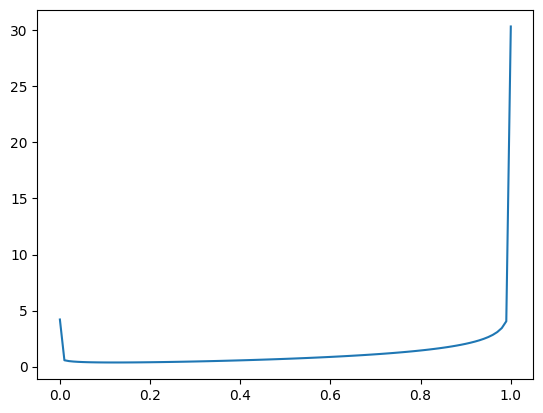

In [23]:
# Loss for predicting different fixed probability values.
losses_ex = [metrics.log_loss(y_test_ex, [y for x in range(len(y_test_ex))]) for y in prob_increments]

# Plot predictions vs loss.
plt.plot(prob_increments, losses_ex)
plt.show()

## Exercise 2

#### Task 1 
##### Take a look at original parameters of our random forest model.
##### Create a grid of parameter ranges as we did in class
##### Call the grid `random_grid_ex`.

#### Result

In [24]:
forest_ex.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [25]:
# Number of trees in random forest.
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split.
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree.
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node.
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node.
min_samples_leaf = [1, 2, 4]


# Create the random grid.
random_grid_ex = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid_ex)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


#### Task 2
##### Instantiate the model, call it `rf_random_ex`.
##### Use 3-fold cross-validation with 100 different combinations.
##### Fit the model with `X_train_ex` and ` y_train_ex` and take a look at the `best_params_`.

#### Result:

In [26]:
# Instantiate the random search.
rf_random_ex = RandomizedSearchCV(estimator = forest_ex, 
                                  param_distributions = random_grid_ex, 
                                  n_iter = 100, 
                                  cv = 3, 
                                  verbose=0, 
                                  random_state= 1, 
                                  n_jobs = -1)
# Fit the random search model.
rf_random_ex.fit(X_train_ex, y_train_ex)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1)

In [27]:
rf_random_ex.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80}

#### Task 3
##### Now use the optimized parameters to implement the optimized model on `X_train_ex`.
##### Name it `optimized_forest_ex`.


#### Result:

In [28]:
optimized_forest_ex = RandomForestClassifier(**rf_random_ex.best_params_)

In [29]:
optimized_forest_ex.fit(X_train_ex, y_train_ex)

RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

#### Task 4
##### Predict the predictions and their probabilities and save as `optimized_forest_y_predict_ex` and `optimized_forest_y_predict_proba_ex` respectively.
##### Find the performance scores of the optimized forest using function `get_performance_scores()` which we defined above.


#### Result:

In [30]:
optimized_forest_y_predict_ex = optimized_forest_ex.predict(X_test_ex)
optimized_forest_y_predict_proba_ex = optimized_forest_ex.predict_proba(X_test_ex)

In [31]:
optimized_forest_scores_ex = get_performance_scores(y_test_ex, 
                                                    optimized_forest_y_predict_ex,
                                                    optimized_forest_y_predict_proba_ex)

print(optimized_forest_scores_ex)

{'accuracy': 0.8816666666666667, 'precision': 0.55, 'recall': 0.1506849315068493, 'f1': 0.23655913978494625, 'fbeta': 0.35947712418300654, 'log_loss': 0.3292953302795677, 'AUC': 0.7712042837461984}


#### Task 5
##### Save the precision-recall curve in `opt_rf_prec_recall_ex`. Set parameters as shown in class.
##### Plot the curves comparing the original model curve `rf_prec_recall_ex` with the optimized one.

#### Result:

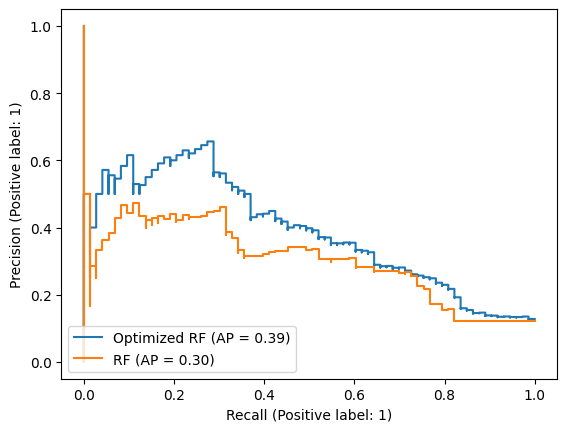

In [32]:
# NOTE: explain why plt.gca is
ax = plt.gca()

opt_rf_prec_recall_ex = metrics.plot_precision_recall_curve(optimized_forest_ex, 
                                                            X_test_ex, 
                                                            y_test_ex,
                                                            ax = ax,
                                                            name = "Optimized RF")


rf_prec_recall_ex.plot(ax = ax, name = "RF")
plt.show()

#### Task 6
##### Similar to above, plot the ROC curve of original model vs the optimized one. 
##### Save the optimized precision-recall curve as `opt_rf_roc_ex`.
#### Result:


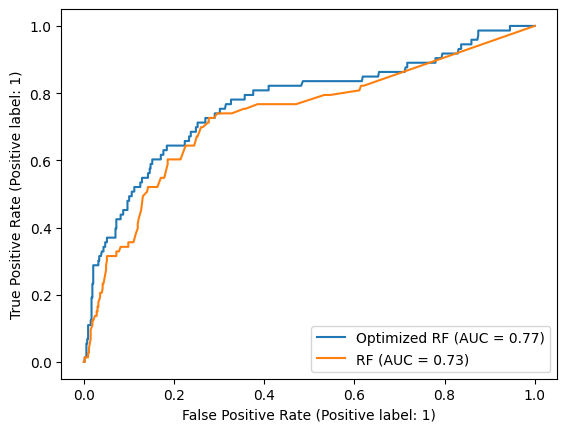

In [33]:
ax = plt.gca()
opt_rf_roc_ex = metrics.plot_roc_curve(optimized_forest_ex,
                       X_test_ex,
                       y_test_ex,
                       name = "Optimized RF",
                       ax = ax)

rf_roc_ex.plot(ax = ax, name = "RF")
plt.show()

#### Task 7
##### Update `metrics_forest_ex` with the optimized random forest scores. Print results.
#### Result:

In [34]:
metrics_forest_ex.update({"Optimized RF": optimized_forest_scores_ex})
print(metrics_forest_ex)

{'RF': {'accuracy': 0.8716666666666667, 'precision': 0.4411764705882353, 'recall': 0.2054794520547945, 'f1': 0.2803738317757009, 'fbeta': 0.3588516746411483, 'log_loss': 1.0075494584661249, 'AUC': 0.7337734917210366}, 'Optimized RF': {'accuracy': 0.8816666666666667, 'precision': 0.55, 'recall': 0.1506849315068493, 'f1': 0.23655913978494625, 'fbeta': 0.35947712418300654, 'log_loss': 0.3292953302795677, 'AUC': 0.7712042837461984}}
